<a href="https://colab.research.google.com/github/manishverma0822/statistics-python/blob/main/notebooks/Correlation_and_scatterplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlation and scatterplots**
Dataset:
Advertising dataset (TV, Radio, Newspaper vs Sales) – GitHub:
https://github.com/justmarkham/DAT8/blob/master/data/advertising.csv


**Task:**

1. Compute Pearson correlation matrix for all numeric variables.

2. Plot scatterplots of each ad channel vs
sales
.

3. Explain why high correlation does not prove causation and inspect at least one casewhere correlation is weaker.

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [34]:
COV_TV_NEWSPAPER = np.cov(df.TV,df.Newspaper)[0][1]
COV_TV_RADIO = np.cov(df.TV,df.Radio)[0][1]
COV_RADIO_NEWSPAPER = np.cov(df.Radio,df.Newspaper)[0][1]

STD_TV = np.std(df.TV)
STD_RADIO = np.std(df.Radio)
STD_NEWSPAPER = np.std(df.Newspaper)

CORR_TV_NEWSPAPER = COV_TV_NEWSPAPER / (STD_TV * STD_NEWSPAPER)
CORR_TV_RADIO = COV_TV_RADIO / (STD_TV * STD_RADIO)
CORR_RADIO_NEWSPAPER = COV_RADIO_NEWSPAPER / (STD_RADIO * STD_NEWSPAPER)


In [35]:
print("Correlation of TV with Newspaper: ", CORR_TV_NEWSPAPER)
print("Correlation of TV with Radio: ", CORR_TV_RADIO)
print("Correlation of Radio with Newspaper: ", CORR_RADIO_NEWSPAPER)

Correlation of TV with Newspaper:  0.056932537653323574
Correlation of TV with Radio:  0.05508408489028146
Correlation of Radio with Newspaper:  0.3558831665941462


In [36]:
#CORR_MATRIX = np.corrcoef(df.TV,df.Newspaper)
#CORR_MATRIX

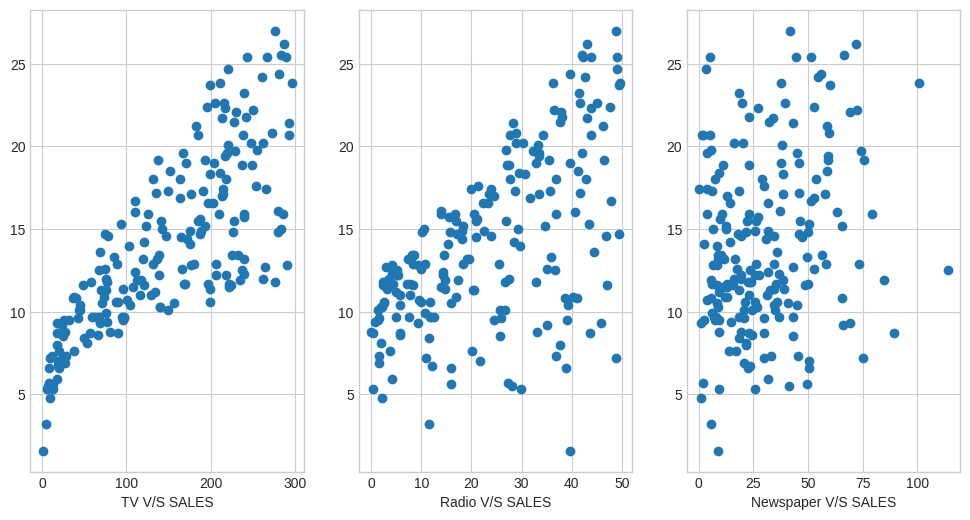

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.scatter(df.TV,df.Sales)
plt.xlabel("TV V/S SALES")

plt.subplot(1,3,2)
plt.scatter(df.Radio,df.Sales)
plt.xlabel("Radio V/S SALES")

plt.subplot(1,3,3)
plt.scatter(df.Newspaper,df.Sales)
plt.xlabel("Newspaper V/S SALES")
plt.show()

In [39]:
CORR_TV = np.corrcoef(df.TV,df.Sales)
CORR_NEWSPAPER = np.corrcoef(df.Newspaper,df.Sales)
CORR_RADIO = np.corrcoef(df.Radio,df.Sales)
print("Correlation of TV with Sales: ", CORR_TV[0][1])
print("Correlation of Radio with Sales: ", CORR_RADIO[0][1])
print("Correlation of Newspaper with Sales: ", CORR_NEWSPAPER[0][1])

Correlation of TV with Sales:  0.7822244248616061
Correlation of Radio with Sales:  0.5762225745710551
Correlation of Newspaper with Sales:  0.22829902637616528


Explain why high correlation does not prove causation and inspect at least one casewhere correlation is weaker?

High correlation ≠ causation
1. It might be possible that there is high correlation between two columns but the they might affected by third column **(confounding Variable)**. For example, Radio is midly co related with sales but it might be possible that for the same advertisement, Cost spent on TV advertisement is also high. So, Sales may be high due to TV ads and not because of radio.
2. Weak correlation is clearly visible in Newspapers and sales.